In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import os

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [54]:
DATA_PATH = "./data"

# Normal distrbution

### Without errors 

In [63]:
df = pd.read_csv(f"{DATA_PATH}/normal_1_51_0.tsv", sep="\t")

In [64]:
df["size"] = df["lhs"] + df["rhs"]
df["diff"] = df["rhs"] - df["lhs"]
df["frac"] = round(df["lhs"] / df["size"], 1)

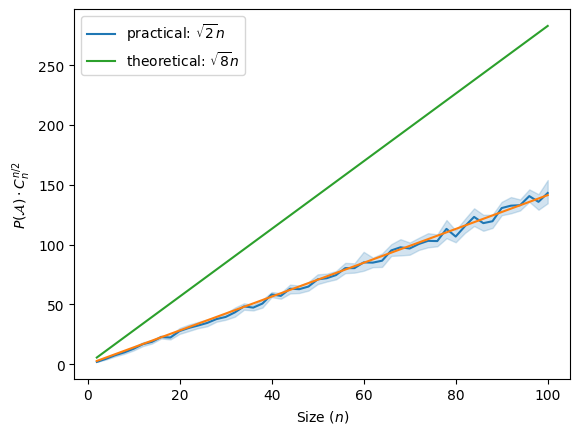

In [66]:
fig, ax = plt.subplots()

plot_df = df.copy()
plot_df = plot_df.loc[plot_df["lhs"] == plot_df["rhs"]]

sns.lineplot(data=plot_df,
             x="size",
             y="nominator",
             label="practical: $\sqrt{2} n$",
             palette="tab10",
             ax=ax)

x = np.sort(plot_df["size"].unique())
y = np.sqrt(2) * x
ax.plot(x, y)

x = np.sort(plot_df["size"].unique())
y = np.sqrt(8) * x
ax.plot(x, y, label="theoretical: $\sqrt{8} n$")

ax.set_xlabel("Size ($n$)")
ax.set_ylabel("$P(\mathcal{A}) \cdot C_n^{n / 2}$")

ax.legend();

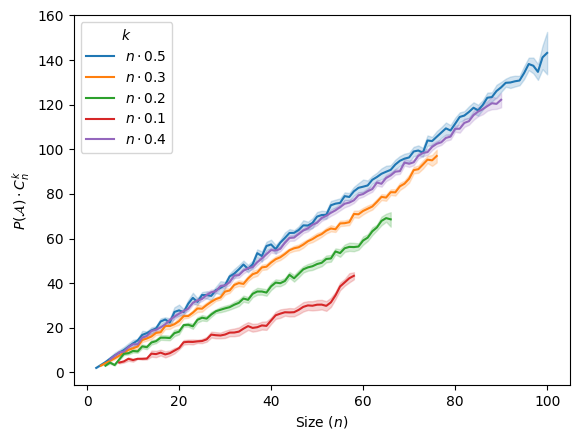

In [67]:
fig, ax = plt.subplots()

plot_df = df.copy()
plot_df = plot_df.loc[
    (plot_df["frac"] == 0.5) \
    | (plot_df["frac"] == 0.4) \
    | (plot_df["frac"] == 0.3) \
    | (plot_df["frac"] == 0.2) \
    | (plot_df["frac"] == 0.1)
]

rename = {q: f"$n \cdot {q}$" for q in [0.1, 0.2, 0.3, 0.4, 0.5]}

plot_df["frac"] = plot_df["frac"].apply(
    lambda x: rename[x]
)

sns.lineplot(data=plot_df,
             x="size",
             y="nominator",
             hue="frac",
             palette="tab10",
             ax=ax)

ax.set_xlabel("Size ($n$)")
ax.set_ylabel("$P(\mathcal{A}) \cdot C_n^{k}$")

ax.legend(title="$k$");

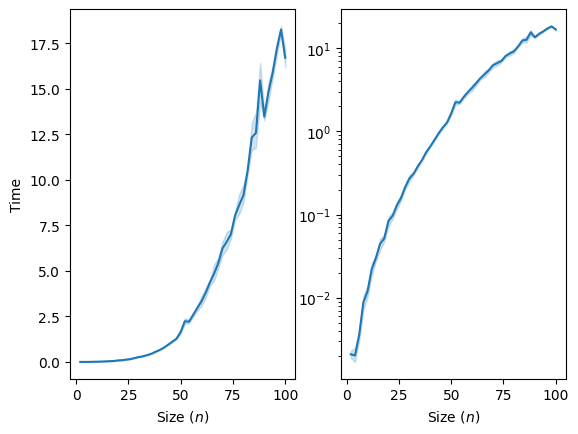

In [68]:
fig, ax = plt.subplots(1, 2)

plot_df = df.copy()
plot_df = plot_df.loc[plot_df["lhs"] == plot_df["rhs"]]

sns.lineplot(data=plot_df,
             x="size",
             y="time",
             palette="tab10",
             ax=ax[0])

sns.lineplot(data=plot_df,
             x="size",
             y="time",
             palette="tab10",
             ax=ax[1])

ax[0].set_xlabel("Size ($n$)")
ax[1].set_xlabel("Size ($n$)")

ax[0].set_ylabel("Time")
ax[1].set_ylabel("")

ax[1].set(yscale="log");

### With errors 

In [69]:
df = None
for i in range(5):
    tmp = pd.read_csv(f"{DATA_PATH}/normal_1_31_{i}.tsv", sep="\t")
    tmp["error"] = i
    tmp["size"] *= 2

    if df is None:
        df = tmp
    else:
        df = pd.concat([df, tmp])

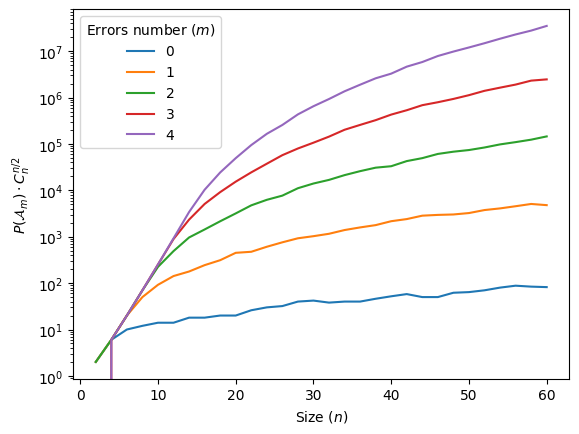

In [70]:
fig, ax = plt.subplots()

plot_df = df.copy()

sns.lineplot(data=plot_df,
             x="size",
             y="nominator",
             hue="error",
             palette="tab10",
             ax=ax)

ax.set_xlabel("Size ($n$)")
ax.set_ylabel("$P(\mathcal{A}_m) \cdot C_n^{n / 2}$")

ax.set(yscale="log")

ax.legend(title="Errors number ($m$)");

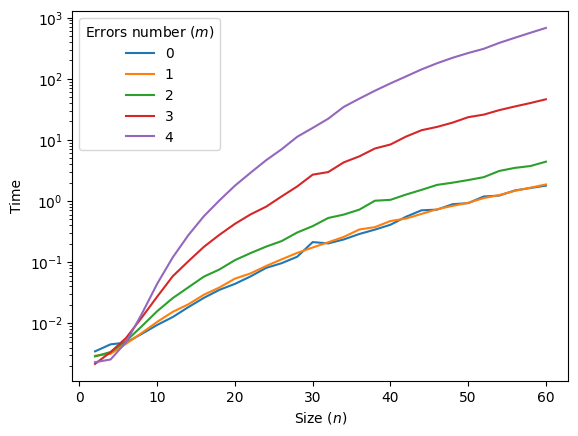

In [71]:
fig, ax = plt.subplots()

plot_df = df.copy()

sns.lineplot(data=plot_df,
             x="size",
             y="time",
             hue="error",
             palette="tab10",
             ax=ax)

ax.set_xlabel("Size ($n$)")
ax.set_ylabel("Time")

ax.set(yscale="log")

ax.legend(title="Errors number ($m$)");